In [1]:
#download database file in sqlite form to the current working directory
!python -m wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite


Saved under m4_survey_data.sqlite


In [2]:
import sqlite3  # use sqlite3 library to work with sql queries
conn = sqlite3.connect("m4_survey_data.sqlite") #connect to database file

In [3]:
import pandas as pd #using pandas library to work with sql queries 
query = 'select distinct * from master '
df = pd.read_sql_query(query,conn) #read query into dataframe
conn.close()
del conn
df.shape

(11398, 63)

array([[<Axes: title={'center': 'ConvertedComp'}>]], dtype=object)

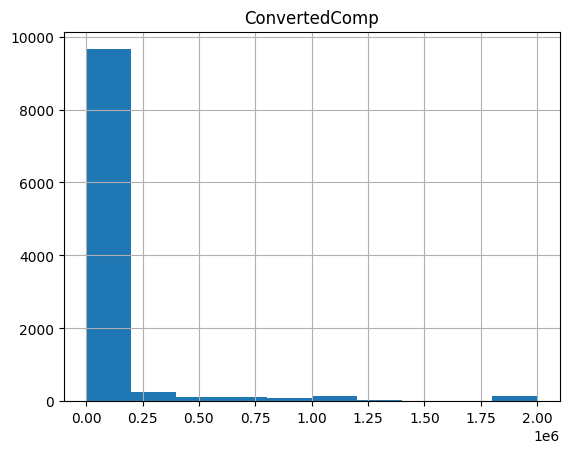

In [4]:
#Visualizing distribution of data
#use pandas to plot histogram
df.hist(column=['ConvertedComp'])

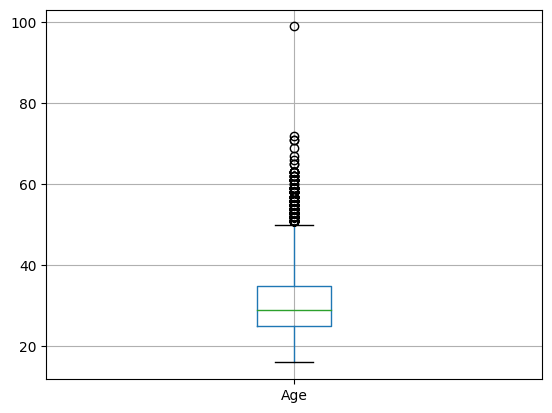

In [5]:
#use pandas to plot a boxplot of Age
plots =df.boxplot(column=['Age'])

<Axes: xlabel='Age', ylabel='WorkWeekHrs'>

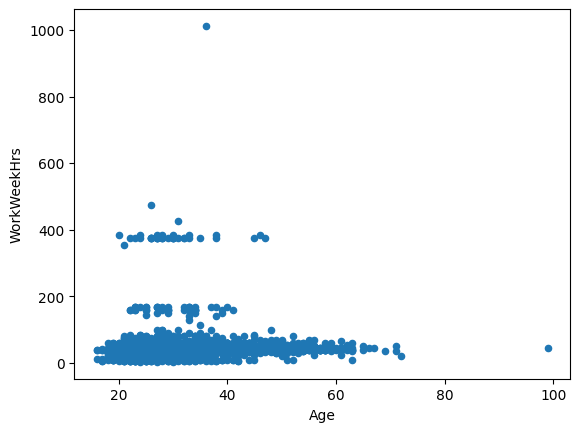

In [6]:
#Visualizing relationships in data
#Create a scatter plot of Age and WorkWeekHrs.
df.plot.scatter(x='Age', y='WorkWeekHrs')

<Axes: xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

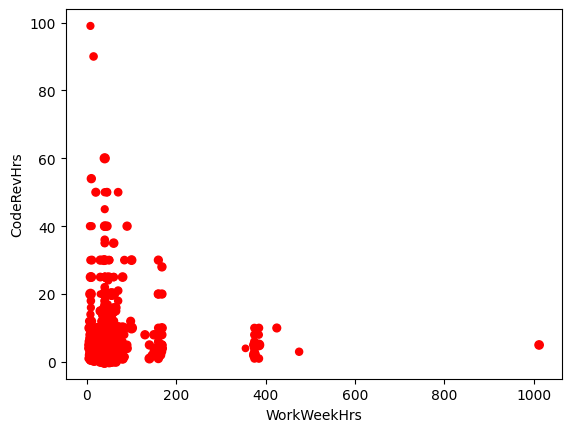

In [7]:
#Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size.
df.plot.scatter(x='WorkWeekHrs', y='CodeRevHrs', s='Age', color='red')


In [8]:
#Visualizing composition of data
#Because the file from sqlite missing some attributes for the questions, so I get original data from Assignemnt overview part of week 4
v_data = pd.read_csv('datawrangling.csv')


In [9]:
#create function for processing multiple types of options in a column of a dataframe
def DataWranglingColumn(dataframe, column, cal):
    dataframe[column] = dataframe[column].fillna('') +';'
    v_result = list(map(str, dataframe[column]))
    v_str=''
    for i in v_result:
        v_str +=i
    v_str = v_str.replace(':','')
    v_str = list(set(v_str.split(';')))
    v_str.remove('')
    for v_item in v_str:
        dataframe[v_item] = dataframe[column].str.find(v_item)
        dataframe.loc[dataframe[v_item] != -1, v_item] = 1
        dataframe.loc[dataframe[v_item] == -1, v_item] = 0
    
    v_dataframe = dataframe.loc[dataframe.index, v_str]
    if cal == 'sum':
        v_dataframe = pd.DataFrame(v_dataframe[v_str].sum())
    elif cal == 'median':
        v_dataframe = pd.DataFrame(v_dataframe[v_str].median())
    elif cal == 'mean':
        v_dataframe = pd.DataFrame(v_dataframe[v_str].mean())
    elif cal == 'count':
        v_dataframe = pd.DataFrame(v_dataframe[v_str].count())    
    else:
        raise Exception('Please update for the calcualtion of function')
    v_dataframe.columns = v_dataframe.columns.astype(str)
    v_dataframe.rename(columns = {'0':'Total'}, inplace = True)
    return v_dataframe    
    

In [10]:
v_bdata = DataWranglingColumn(v_data,'DatabaseDesireNextYear','sum')

In [11]:
v_bdata = v_bdata.sort_values(by='Total', ascending=False).head(5)
v_bdata

,Total
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


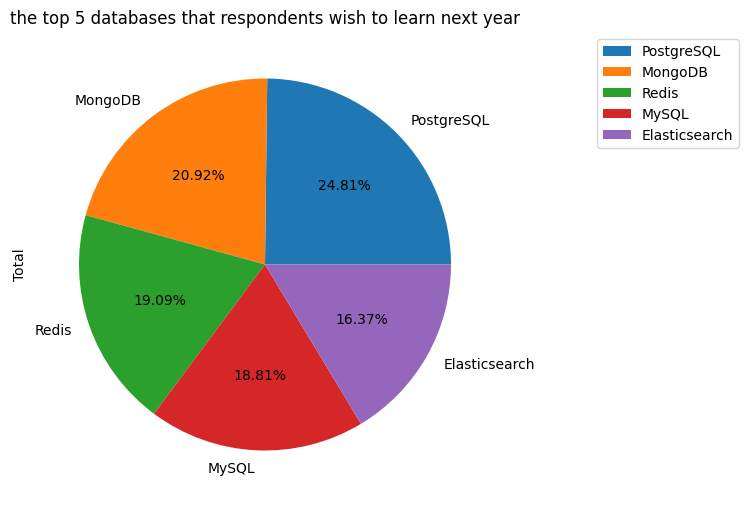

In [12]:
#Create a pie chart of the top 5 databases that respondents wish to learn next year. 
#Label the pie chart with database names. Display percentages of each database on the pie chart.
plots = v_bdata.plot.pie(y='Total', autopct='%.2f%%', figsize=(6,10), title='the top 5 databases that respondents wish to learn next year')
plots.legend(loc='upper left', bbox_to_anchor=(1.2,1))


In [13]:
#Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35
v_sdata = df.loc[(df['Age'] >= 30) & (df['Age'] <=35),['Age','WorkWeekHrs','CodeRevHrs']]
v_sdata = v_sdata.groupby(by=['Age'])[['WorkWeekHrs','CodeRevHrs']].median()

In [14]:
v_sdata

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


<Axes: ylabel='Age'>

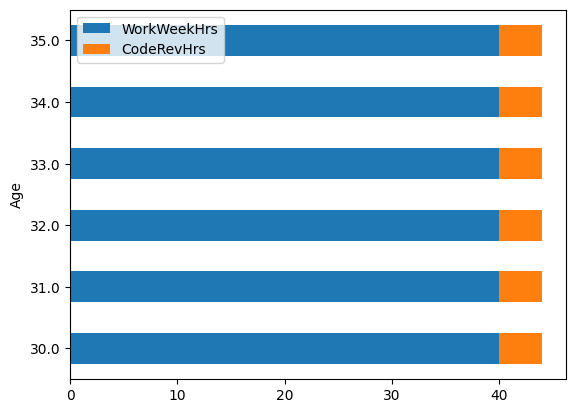

In [15]:
#Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.
v_sdata.plot.barh(stacked=True)

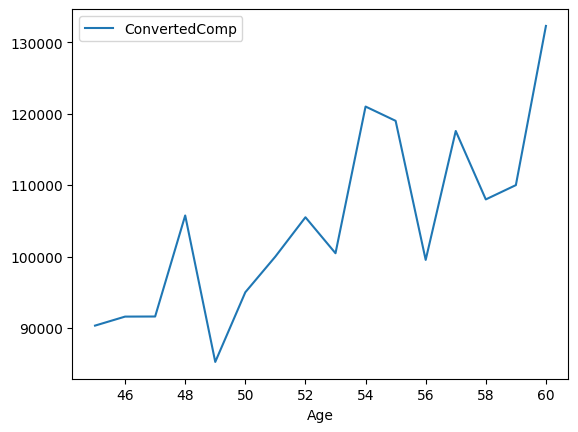

In [16]:
#Visualizing comparison of data
#Plot line chart of the median ConvertedComp for all ages from 45 to 60.
h_plot = df.loc[(df['Age'] >= 45) & (df['Age'] <=60),['Age','ConvertedComp']]
h_plot = pd.DataFrame(h_plot.groupby(by=['Age'])['ConvertedComp'].median())
lines = h_plot.plot.line(y='ConvertedComp')

In [17]:
#Create a horizontal bar chart using column MainBranch.
b_chart= df.groupby( by=['MainBranch']).count()
b_chart = b_chart[['index']].reset_index()
b_chart.rename(columns={'index':'Total'}, inplace=True)

<Axes: xlabel='MainBranch'>

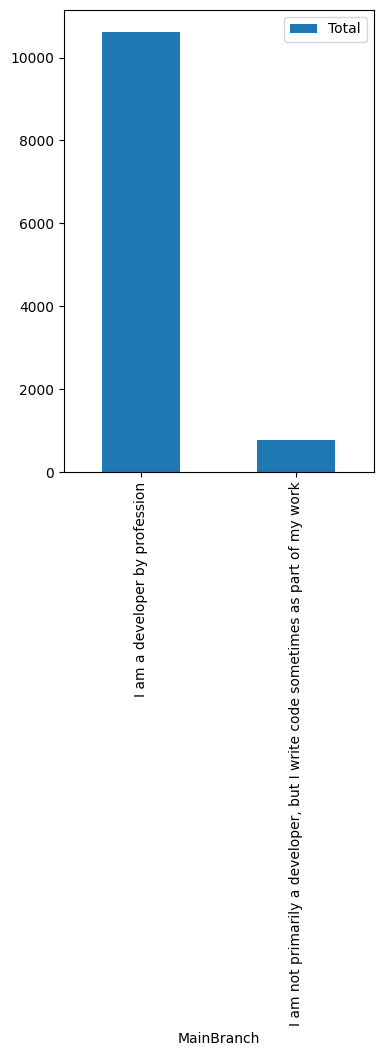

In [18]:
b_chart.plot.bar( y='Total', x ='MainBranch', figsize=(4,6))

In [19]:
v_Type =  DataWranglingColumn(v_data,'DevType','sum')

In [20]:
v_Type = v_Type.sort_values(by='Total', ascending=False)

In [21]:
v_Type

,Total
"Developer, full-stack",6928
"Developer, back-end",6290
"Developer, front-end",3920
"Developer, desktop or enterprise applications",2575
"Developer, mobile",1959
DevOps specialist,1639
Database administrator,1413
System administrator,1202
Designer,988
"Developer, QA or test",911
